# Tom and jerry, loading dataset

## Imports

In [1]:
import kagglehub

from pathlib import Path

import keras

from matplotlib import pyplot as plt

import numpy as np

import tensorflow as tf

## Get the data

In [2]:
path = Path(kagglehub.dataset_download("balabaskar/tom-and-jerry-image-classification"))

100%|██████████| 435M/435M [00:23<00:00, 19.4MB/s]

Extracting files...


In [3]:
data_path = path / "tom_and_jerry/tom_and_jerry"

## Load data

In [40]:
train_data, test_data = keras.utils.image_dataset_from_directory(
    data_path,
    seed=10,
    validation_split=0.2,
    subset="both",
    batch_size=12,
    image_size=(80, 190),
    shuffle=True,
)

Found 5478 files belonging to 4 classes.
Using 4383 files for training.
Using 1095 files for validation.


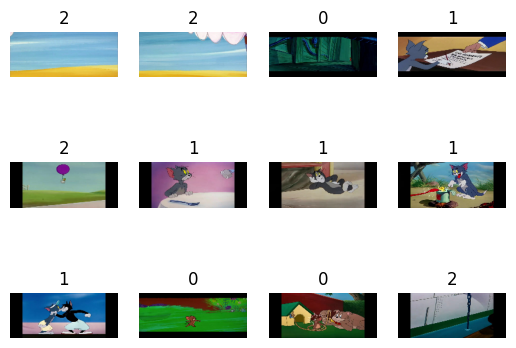

In [41]:
one_batch = next(train_data.as_numpy_iterator())

fig, axes = plt.subplots(3, 4)

axes_ravel = axes.ravel()

for i, (image, label) in enumerate(zip(one_batch[0], one_batch[1])):
    axes_ravel[i].imshow(image.astype("uint8"))
    axes_ravel[i].set_axis_off()
    axes_ravel[i].set_title(f"{label}")


## Transfer learning

In [16]:
base_model = keras.applications.MobileNetV2(include_top=False)

base_model.trainable = False

<ipython-input-16-08f0337e752c>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(include_top=False)


In [17]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(80, 190, 3)),
        base_model,
        keras.layers.Flatten(),
        keras.layers.Dense(4, activation="softmax"),
    ],
)


In [18]:
model.summary(show_trainable=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)   │ (None, 2, 5, 1280)           │     2,257,984 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ flatten_1 (Flatten)                 │ (None, 12800)                │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_1 (Dense)                     │ (None, 4)                    │        51,204 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 2,309,188 (8.81 MB)

 Trainable params: 51,204 (200.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
train_data

tf.Tensor(0, shape=(), dtype=int32)


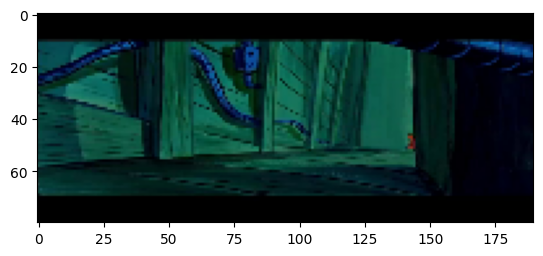

In [42]:
images, labels = next(iter(train_data.take(1)))

for x, y in zip(images, labels):
  plt.figure()
  plt.imshow(x.numpy().astype("uint8"))
  print(y)
  break

In [22]:
sum([1 for _ in train_data])

366

In [24]:
train_data_size = np.ceil(366 * 0.8)

train_part = train_data.take(train_data_size)
validation_part = train_data.skip(train_data_size)

In [25]:
sum([1 for _ in train_part])

293

In [26]:
sum([1 for _ in validation_part])

73

In [19]:
model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

In [21]:
model.fit(train_data,
          epochs = 10)

Epoch 1/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.4165 - loss: 2.6105
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6351 - loss: 1.3150
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.7184 - loss: 0.9895
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.7593 - loss: 0.8528
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.8072 - loss: 0.6311
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.8100 - loss: 0.6587
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.8447 - loss: 0.4778
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8723 - loss: 0.4003
Epoch 9/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.8816 - loss: 0.3730
Epoch 10/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9121 - loss: 0.2720


In [11]:
model.evaluate(test_data)

92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 189ms/step - accuracy: 0.7178 - loss: 36.1210


[31.37490463256836, 0.7251141667366028]